# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 4. Доверительные интервалы
### Дедлайн --- 29 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. **Пожалуйста, не стирайте условия задач и не переименовывайте ноутбук!**

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

from tqdm.notebook import tqdm
from typing import Callable

sns.set(font_scale=1.4, style='whitegrid', palette='Set2')
seed = 42

## Задача 1

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал оценки $\widehat{\theta}$
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

In [2]:
def draw_confidence_interval(sample, estim, conf_int_left, conf_int_right, ylims=None):
    plt.figure(figsize=(12, 7))
    plt.scatter(n_arr, sample, alpha=0.3, label="sample")
    plt.plot(n_arr, estim, color='green', label="$\\theta^*$")
    plt.fill_between(n_arr, conf_int_left, conf_int_right, 
                     alpha=0.2, facecolor='green', label="conf. int.")
    
    plt.xlabel("$n$")
    plt.ylabel("$\\theta$")
    plt.ylim(ylims)
    plt.grid(True)
    
    legend = plt.legend()
    for lh in legend.legendHandles: 
        lh.set_alpha(1)
    plt.show()


alpha = 0.95
n = 100
n_arr = np.arange(1, n+1)
theta = 10
gamma_lambda = 3

left_quantile = sps.norm().ppf((1 + alpha) / 2)
right_quantile = sps.norm().ppf((1 - alpha) / 2)

Выполните задание для следующих $P_\theta$ и $\widehat{\theta}$ (формулы доверительных итервалов были получены на семинарах):

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

$\left( \dfrac{X_{(n)}(n+1)}{n + \sqrt{\dfrac{n}{(n+2)(1 - \alpha)}}}, \: 
        \dfrac{X_{(n)}(n+1)}{n - \sqrt{\dfrac{n}{(n+2)(1 - \alpha)}}}\right)$ = 
$\left( \dfrac{X_{(n)} (n+1)}{n} \cdot \dfrac{1}{1+t_n}, \: 
        \dfrac{X_{(n)} (n+1)}{n} \cdot \dfrac{1}{1-t_n} \right), \:$ 
где $t_n = O(\frac{1}{n})$

In [3]:
unif_sample = sps.uniform(scale=theta).rvs(size=n, random_state=seed)
nth_order_stats = np.maximum.accumulate(unif_sample)

numerator = nth_order_stats * (n_arr + 1)
sq_root_part = np.sqrt(n_arr / (n_arr + 2) / (1 - alpha))

conf_int_left = numerator / (n_arr + sq_root_part)
conf_int_right = numerator / (n_arr - sq_root_part)

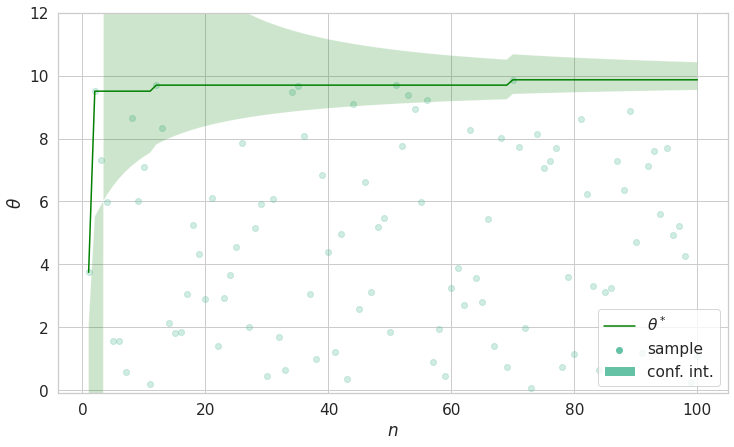

In [4]:
draw_confidence_interval(unif_sample, 
                         nth_order_stats, 
                         conf_int_left, 
                         conf_int_right,
                         ylims=(-0.1, 12))

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

$\left( \hat{\mu} - \dfrac{\pi}{2\sqrt{n}}u_{\frac{1 + \alpha}{2}}, \: 
        \hat{\mu} - \dfrac{\pi}{2\sqrt{n}}u_{\frac{1 - \alpha}{2}}\right)$, 
где $u_{\alpha} - \alpha \text{-квантиль из } \mathcal{N}(0, 1)$

In [5]:
cauchy_sample = sps.cauchy(loc=theta).rvs(size=n, random_state=seed)
medians = list(map(lambda n: np.median(cauchy_sample[:n]), n_arr))
medians = np.array(medians)

coef = np.pi / np.sqrt(n_arr) / 2
conf_int_left = medians - coef * left_quantile
conf_int_right = medians - coef * right_quantile

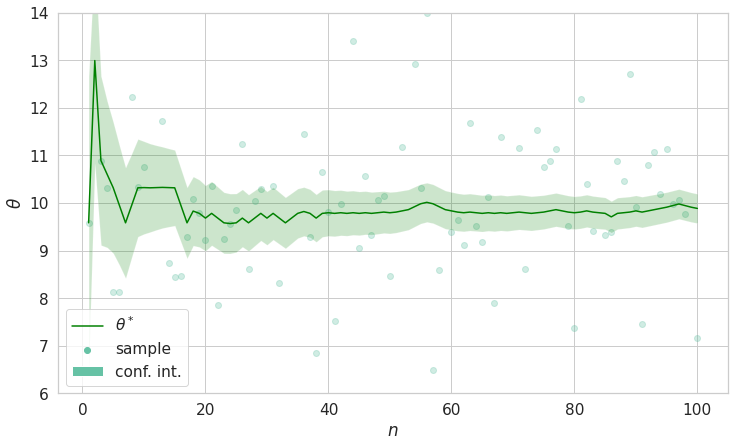

In [6]:
draw_confidence_interval(cauchy_sample, 
                         medians, 
                         conf_int_left, 
                         conf_int_right, 
                         ylims=(6, 14))

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

$\left( \overline{X} - \sqrt{\dfrac{\overline{X}}{n}} u_{\frac{1 + \alpha}{2}}, \: 
        \overline{X} - \sqrt{\dfrac{\overline{X}}{n}} u_{\frac{1 - \alpha}{2}} \right), \:$ 
где $u_{\alpha} - \alpha \text{-квантиль из } \mathcal{N}(0, 1)$

In [7]:
poiss_sample = sps.poisson(mu=theta).rvs(size=n, random_state=seed)
means = np.cumsum(poiss_sample) / n_arr

coef = np.sqrt(means / n_arr)
conf_int_left = means - coef * left_quantile
conf_int_right = means - coef * right_quantile

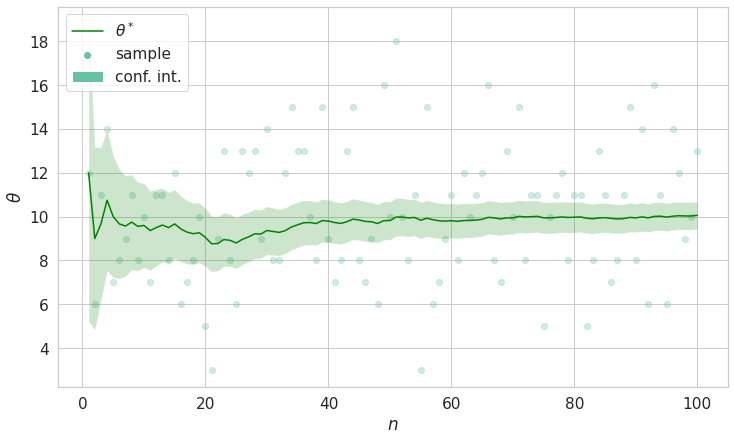

In [8]:
draw_confidence_interval(poiss_sample, 
                         means, 
                         conf_int_left, 
                         conf_int_right, 
                         ylims=None)

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

$p(\theta, \lambda, x) = \dfrac{\theta^\alpha x^{\lambda - 1} e^{-\theta x}}{\Gamma(\lambda)} I(x \geqslant 0)$  

$\left( \dfrac{\lambda}{\overline{X}} - \dfrac{\sqrt{\lambda}}{\overline{X} \sqrt{n}} u_{\frac{1+\alpha}{2}}, \: 
        \dfrac{\lambda}{\overline{X}} - \dfrac{\sqrt{\lambda}}{\overline{X} \sqrt{n}} u_{\frac{1-\alpha}{2}}
        \right), \:$ 
где $u_{\alpha} - \alpha \text{-квантиль из } \mathcal{N}(0, 1)$

In [9]:
gamma_sample = sps.gamma(a=gamma_lambda, scale=1.0/theta).rvs(size=n, random_state=seed)
estim = gamma_lambda * n_arr / np.cumsum(gamma_sample)

coef = estim / np.sqrt(gamma_lambda * n_arr)
conf_int_left = estim - coef * left_quantile
conf_int_right = estim - coef * right_quantile

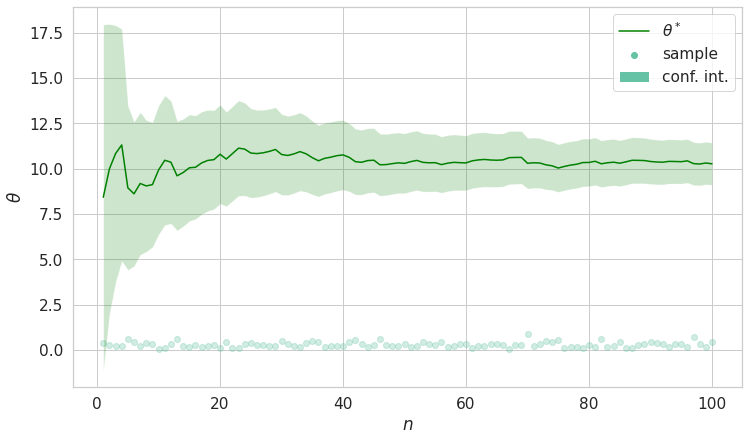

In [10]:
draw_confidence_interval(gamma_sample, 
                         estim, 
                         conf_int_left, 
                         conf_int_right, 
                         ylims=None)

Сделайте выводы о размерах и форме доверительных интервалов для каждого случая.

**Вывод**: Размер ДИ для равномерного распределения составляет $O \left(\dfrac{1}{n} \right)$, в то время
как для остальных распределений ДИ имеет длину $O \left(\dfrac{1}{\sqrt n} \right)$. 
Это связано с тем, что в 1ом случае строился обычный ДИ через неравенство Чебышева, а в остальных - асимптотический через сходимость по распределению к стандартному нормальному.
Однако при малых $n$ длина последних заметно меньше, чем длина ДИ для равномерного распределения.  
Поскольку в первом случае для построения ДИ рассматривалась статистика $X_{(n)}$, то ожидаемо, что график нижней и верхней границ является кусочно-гладкой функцией, в то время как для остальных ДИ использовались среднее/медиана, от чего графики имеют множество небольших скачков

# Задача 2

Для $n = 100$ оцените для кажого пункта предыдущей задачи вероятность попадания истинного значения
$\theta$ в интервал. Для этого нужно сделать слудующее:
1. Сгенерируйте достаточно много выборок из $P_{\theta}$
2. Постройте по каждой из них интервалы для $\widehat{\theta}$
3. Определите, сколько раз истинное значение $\theta.$ попадает в построенные интервалы. Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

Предположите, какое количество выборок нужно взять. Обоснуйте свой выбор.

__Ответ:__ Чем больше, тем лучше.

In [11]:
def count_good_intervals(conf_int_left, conf_int_right):
    return np.sum(np.bitwise_and(conf_int_left <= theta, theta <= conf_int_right))


N = 100000

### Равномерное распределение

In [12]:
unif_sample = sps.uniform(scale=theta).rvs(size=(N,n), random_state=seed)
nth_order_stats = np.max(unif_sample, axis=1)

numerator = nth_order_stats * (n + 1)
sq_root_part = np.sqrt(n / (n + 2) / (1 - alpha))

conf_int_left = numerator / (n + sq_root_part)
conf_int_right = numerator / (n - sq_root_part)

In [13]:
count_good_intervals(conf_int_left, conf_int_right) / N * 100

99.612

### Распределение Коши

In [14]:
cauchy_sample = sps.cauchy(loc=theta).rvs(size=(N,n), random_state=seed)
medians = np.median(cauchy_sample, axis=1)

coef = np.pi / np.sqrt(n) / 2
conf_int_left = medians - coef * left_quantile
conf_int_right = medians - coef * right_quantile

In [15]:
count_good_intervals(conf_int_left, conf_int_right) / N * 100

94.702

### Распределение Пуассона

In [16]:
poiss_sample = sps.poisson(mu=theta).rvs(size=(N,n), random_state=seed)
means = np.mean(poiss_sample, axis=1)

coef = np.sqrt(means / n)
conf_int_left = means - coef * left_quantile
conf_int_right = means - coef * right_quantile

In [17]:
count_good_intervals(conf_int_left, conf_int_right) / N * 100

95.051

### Гамма-распределение

In [18]:
gamma_sample = sps.gamma(a=gamma_lambda, scale=1.0/theta).rvs(size=(N,n), random_state=seed)
estim = gamma_lambda / np.mean(gamma_sample, axis=1)

coef = estim / np.sqrt(gamma_lambda * n)
conf_int_left = estim - coef * left_quantile
conf_int_right = estim - coef * right_quantile

In [19]:
count_good_intervals(conf_int_left, conf_int_right) / N * 100

95.072

Сделайте выводы.  

**Вывод**: Поскольку для последних трёх распределений были построены асимптотические ДИ с уровнем значимости 0.95, 
то вполне ожидаемо, что процентное соотношение попаданий $\theta$ в построенные интервалы близко к 95%. 
Для равномерного распределения был построен обычный ДИ, поэтому так сложилось, что искомое процентное соотношение оказалось >95%

# Задача 3

В этой задаче мы построим точный и асимптотический доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$


Для $n=30, \,a = 0$ постройте __на одном графике__ точный и асимптотический доверительный интервал, а также отметьте линией истинное значение $a$

Точный ДИ: $\left( \overline{X} - \dfrac{S}{\sqrt{n-1}} z_{\frac{1+\gamma}{2}}, \:
                   \overline{X} + \dfrac{S}{\sqrt{n-1}} z_{\frac{1+\gamma}{2}} \right), $
где $z_\alpha - \alpha$-квантиль распределения Стьюдента с $n-1$ степенью свободы

Асимпт. ДИ: $\left( \overline{X} - \dfrac{S}{\sqrt{n}} u_{\frac{1+\gamma}{2}}, \:
                   \overline{X} + \dfrac{S}{\sqrt{n}} u_{\frac{1+\gamma}{2}} \right), $
где $u_\alpha - \alpha$-квантиль станд. норм. распределения

In [20]:
def calculate_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление точного доверительного интервала уровня доверия alpha. """
    mean = sample.mean()
    var = sample.var()
    n = sample.size
    student_quantile = sps.t(n-1).ppf((1+alpha)/2)
    
    return mean - np.sqrt(var/(n-1))*student_quantile, \
            mean + np.sqrt(var/(n-1))*student_quantile

In [21]:
def calculate_asymptotic_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление асимптотического доверительного интервала уровня доверия alpha. """
    mean = sample.mean()
    var = sample.var()
    n = sample.size
    quantile = sps.norm().ppf((1+alpha)/2)
    
    return mean - np.sqrt(var/(n))*quantile, \
            mean + np.sqrt(var/(n))*quantile
    pass

In [22]:
sample = sps.norm(scale=10).rvs(size=30, random_state=seed)
n_arr = np.arange(2, 1+sample.size)

conf_intervals = list(map(lambda n: calculate_conf_interval(sample[:n]), n_arr))
conf_intervals = np.array(conf_intervals).reshape(n_arr.size, 2).T

asymptotic_intervals = list(map(lambda n: calculate_asymptotic_conf_interval(sample[:n]), n_arr))
asymptotic_intervals = np.array(asymptotic_intervals).reshape(n_arr.size, 2).T

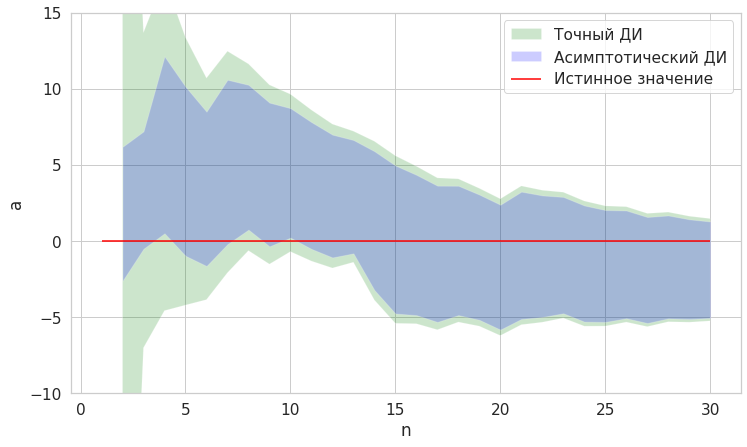

In [23]:
plt.figure(figsize=(12, 7))
plt.fill_between(n_arr, conf_intervals[0], conf_intervals[1], 
                 label="Точный ДИ", alpha=0.2, facecolor='green')
plt.fill_between(n_arr, asymptotic_intervals[0], asymptotic_intervals[1], 
                 label="Асимптотический ДИ", alpha=0.2, facecolor='blue')
plt.hlines(y=0, xmin=1, xmax=n_arr[-1], colors='red', label='Истинное значение')

plt.ylim((-10, 15))
plt.xlabel('n')
plt.ylabel('a')
plt.grid(True)
plt.legend()
plt.show()

Сделайте выводы. В каких случаях уместно использовать асимптотический интервал вместо точного?  

**Вывод**: Исходя из графика, уже при n > 25 точный и асимптотические ДИ становятся неразличимы друг от друга ввиду их одинаковой асимптотической длины и близости значений $\alpha$-квантиля распределения Стьюдента и $\alpha$-квантиля станд. норм. распределения.  
Однако при меньших значениях n длина асимпт. ДИ меньше за счёт большего $\alpha$-квантиля распределения Стьюдента. Так что асимптотический доверительный интервал лучше использовать для маленьких выборок, если его длина критична

# Задача 4

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [24]:
#!gdown https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC 

Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

In [25]:
df = pd.read_csv("./city_day.csv", usecols=["City", "Date", "AQI"])

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df['Date'] = pd.to_datetime(df.Date)

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

In [26]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [27]:
start_date = pd.to_datetime("2018-07-01")

mumbai = df.loc[(df["City"] == "Mumbai") & (df["Date"] >= start_date)]
kolkata = df.loc[(df["City"] == "Kolkata") & (df["Date"] >= start_date)]

В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 - \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 + \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [28]:
import math

In [29]:
def get_dataset_by_month(
    df: pd.DataFrame, 
    year: int,
    month: int
):
    """ Сохранение в массив данные для указанного месяца и года."""
    
    return df[(df["Year"] == year) & (df["Month"] == month)]['AQI']

In [30]:
def get_bootstrap_samples(
    sample: np.ndarray,
    k: int = 1000
):
    """ Построение k бутстрепных выборок для указанной выборки. """
    
    bs_indices = np.random.randint(0, sample.size, sample.size*k)
    return sample[bs_indices].reshape(k, sample.size)

In [31]:
def bootstrap_conf_interval(
    sample: np.ndarray,
    estimator: Callable = lambda x: np.mean(x, axis=-1),
    alpha: float = 0.95,
):
    """ Построение бутстрепных доверительных интервалов. """
    
    estimations = estimator(sample)
    sorted_estimations = np.sort(estimations)
    
    left_ind = math.floor(estimations.size * 0.5 * (1 - alpha))
    right_ind = math.ceil(estimations.size * 0.5 * (1 + alpha))
    
    return sorted_estimations[left_ind], sorted_estimations[right_ind]

In [32]:
def bs_conf_intervals_by_month(df, start_date=start_date, 
                               end_date=pd.to_datetime('2020-07-01')):
    bs_conf_intervals = []
    step = pd.offsets.MonthBegin()
    date = start_date

    while date < end_date:
        month_data = get_dataset_by_month(df, date.year, date.month).values
        bs_samples = get_bootstrap_samples(month_data)
        conf_interval = bootstrap_conf_interval(bs_samples)

        bs_conf_intervals.append(conf_interval)
        date += step
        
    return np.array(bs_conf_intervals).reshape(-1, 2).T

In [33]:
def means_by_month(df, start_date=start_date, 
                   end_date=pd.to_datetime('2020-07-01')):
    means = []
    step = pd.offsets.MonthBegin()
    date = start_date

    while date < end_date:
        month_data = get_dataset_by_month(df, date.year, date.month).values
        means.append(month_data.mean())
        date += step
        
    return np.array(means)

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [34]:
ym = mumbai[['Year', 'Month']].drop_duplicates().values[:-1]
labels = [f"{year}-{month}" for year, month in ym]
n_arr = np.arange(ym.shape[0])

mumbai_color = "blue"
kolkata_color = "green"

mumbai_intervals = bs_conf_intervals_by_month(mumbai)
kolkata_intervals = bs_conf_intervals_by_month(kolkata)

mumbai_mean_aqi = means_by_month(mumbai)
kolkata_mean_aqi = means_by_month(kolkata)

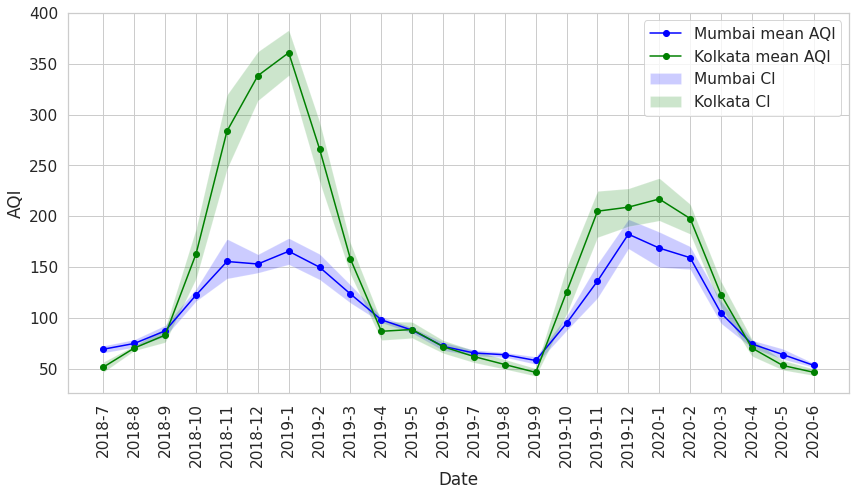

In [35]:
plt.figure(figsize=(14, 7))

plt.plot(n_arr, mumbai_mean_aqi, '-o', color=mumbai_color, label="Mumbai mean AQI")
plt.fill_between(n_arr, mumbai_intervals[0], mumbai_intervals[1], 
                    facecolor=mumbai_color, alpha=0.2, label="Mumbai CI")

plt.plot(n_arr, kolkata_mean_aqi, '-o', color=kolkata_color, label="Kolkata mean AQI")
plt.fill_between(n_arr, kolkata_intervals[0], kolkata_intervals[1], 
                    facecolor=kolkata_color, alpha=0.2, label="Kolkata CI")

plt.xticks(n_arr, labels, rotation=90)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.legend()
plt.show()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

<i> Ответ <i>: На графике видно, что индекс качества воздуха зависит от времени года: AQI минимален в летнее время года, и максимален в зимнее. Предположительно, это связано с особенностями климата Индии, которые повторяются из года в год.  
    
<i> PS <i>: Данный феномен называется `winter inversion`, про него можно прочитать тут: https://weather.com/en-IN/india/science/news/2018-10-30-why-do-pollution-levels-skyrocket-during-winter
    

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [36]:
days = np.arange(1, 31)
month_step = pd.offsets.MonthBegin()
first_date = pd.to_datetime("2019-04-01")
second_date = pd.to_datetime("2020-04-01")

first_mumbai_ci = bs_conf_intervals_by_month(mumbai, 
                                             first_date,
                                             first_date+month_step)
second_mumbai_ci = bs_conf_intervals_by_month(mumbai, 
                                              second_date,
                                              second_date+month_step)

first_mumbai_data = get_dataset_by_month(mumbai, 
                                         first_date.year, 
                                         first_date.month)
second_mumbai_data = get_dataset_by_month(mumbai, 
                                          second_date.year, 
                                          second_date.month)

first_mumbai_aqi_mean = first_mumbai_data.mean()
second_mumbai_aqi_mean = second_mumbai_data.mean()

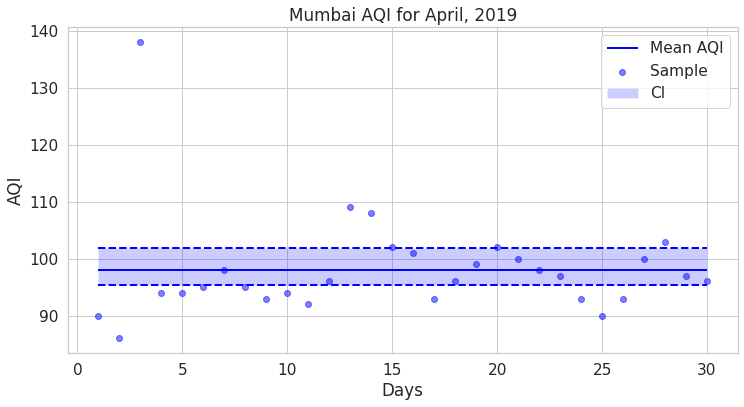

CI length = 6.433333333333337
Std = 9.066548342703232


In [43]:
plt.figure(figsize=(12, 6))

plt.hlines(first_mumbai_ci[0], xmin=days[0], xmax=days[-1], linestyles="dashed", 
           color=mumbai_color, lw=2)
plt.hlines(first_mumbai_ci[1], xmin=days[0], xmax=days[-1], linestyles="dashed", 
           color=mumbai_color, lw=2)
plt.hlines(first_mumbai_aqi_mean, xmin=days[0], xmax=days[-1], label="Mean AQI", 
           color=mumbai_color, lw=2)

plt.scatter(days, first_mumbai_data, color=mumbai_color, alpha=0.5,
            label="Sample")
plt.fill_between(days, first_mumbai_ci[0], first_mumbai_ci[1], 
                 facecolor=mumbai_color, alpha=0.2, label='CI')

plt.title("Mumbai AQI for April, 2019")
plt.xlabel("Days")
plt.ylabel("AQI")
plt.grid(True)
plt.legend()
plt.show()

print("CI length =", round(first_mumbai_ci[1, 0] - first_mumbai_ci[0, 0], 3))
print("Std =", round(first_mumbai_data.std(), 3))

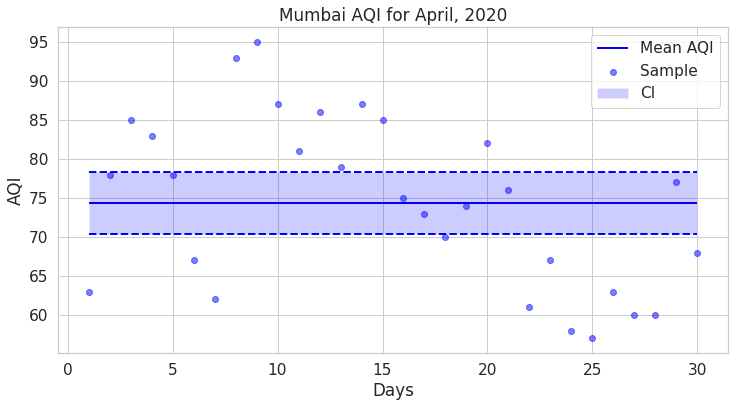

CI length = 7.967
Std = 10.877


In [45]:
plt.figure(figsize=(12, 6))

plt.hlines(second_mumbai_ci[0], xmin=days[0], xmax=days[-1], linestyles="dashed", 
           color=mumbai_color, lw=2)
plt.hlines(second_mumbai_ci[1], xmin=days[0], xmax=days[-1], linestyles="dashed", 
           color=mumbai_color, lw=2)
plt.hlines(second_mumbai_aqi_mean, xmin=days[0], xmax=days[-1], label="Mean AQI", 
           color=mumbai_color, lw=2)

plt.scatter(days, second_mumbai_data, color=mumbai_color, alpha=0.5,
            label="Sample")
plt.fill_between(days, second_mumbai_ci[0], second_mumbai_ci[1], 
                 facecolor=mumbai_color, alpha=0.2, label='CI')

plt.title("Mumbai AQI for April, 2020")
plt.xlabel("Days")
plt.ylabel("AQI")
plt.grid(True)
plt.legend()
plt.show()

print("CI length =", round(second_mumbai_ci[1, 0] - second_mumbai_ci[0, 0], 3))
print("Std =", round(second_mumbai_data.std(), 3))

Теперь проделайте то же самое для Калькутты

In [39]:
first_kolkata_ci = bs_conf_intervals_by_month(kolkata, 
                                             first_date,
                                             first_date+month_step)
second_kolkata_ci = bs_conf_intervals_by_month(kolkata, 
                                              second_date,
                                              second_date+month_step)

first_kolkata_data = get_dataset_by_month(kolkata, 
                                         first_date.year, 
                                         first_date.month)
second_kolkata_data = get_dataset_by_month(kolkata, 
                                          second_date.year, 
                                          second_date.month)

first_kolkata_aqi_mean = first_kolkata_data.mean()
second_kolkata_aqi_mean = second_kolkata_data.mean()

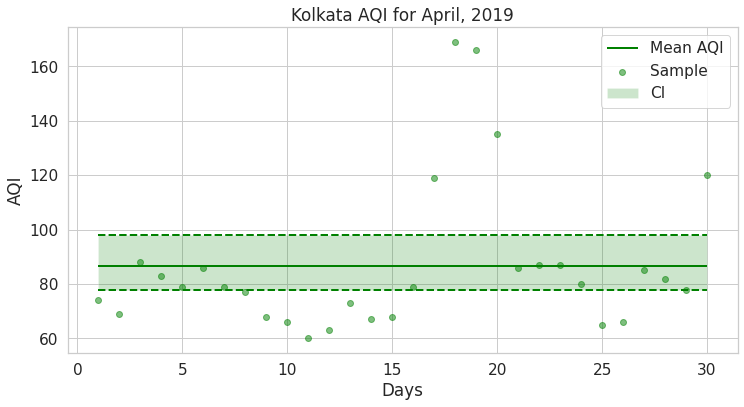

CI length = 20.433
Std = 27.751


In [46]:
plt.figure(figsize=(12, 6))

plt.hlines(first_kolkata_ci[0], xmin=days[0], xmax=days[-1], linestyles="dashed", 
           color=kolkata_color, lw=2)
plt.hlines(first_kolkata_ci[1], xmin=days[0], xmax=days[-1], linestyles="dashed", 
           color=kolkata_color, lw=2)
plt.hlines(first_kolkata_aqi_mean, xmin=days[0], xmax=days[-1], label="Mean AQI", 
           color=kolkata_color, lw=2)

plt.scatter(days, first_kolkata_data, color=kolkata_color, alpha=0.5,
            label="Sample")
plt.fill_between(days, first_kolkata_ci[0], first_kolkata_ci[1], 
                 facecolor=kolkata_color, alpha=0.2, label='CI')

plt.title("Kolkata AQI for April, 2019")
plt.xlabel("Days")
plt.ylabel("AQI")
plt.grid(True)
plt.legend()
plt.show()

print("CI length =", round(first_kolkata_ci[1, 0] - first_kolkata_ci[0, 0], 3))
print("Std =", round(first_kolkata_data.std(), 3))

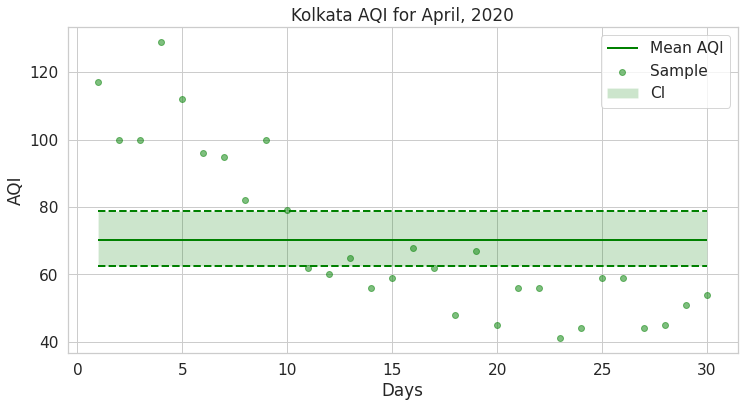

CI length = 16.4
Std = 24.521


In [47]:
plt.figure(figsize=(12, 6))

plt.hlines(second_kolkata_ci[0], xmin=days[0], xmax=days[-1], linestyles="dashed", 
           color=kolkata_color, lw=2)
plt.hlines(second_kolkata_ci[1], xmin=days[0], xmax=days[-1], linestyles="dashed", 
           color=kolkata_color, lw=2)
plt.hlines(second_kolkata_aqi_mean, xmin=days[0], xmax=days[-1], label="Mean AQI", 
           color=kolkata_color, lw=2)

plt.scatter(days, second_kolkata_data, color=kolkata_color, alpha=0.5,
            label="Sample")
plt.fill_between(days, second_kolkata_ci[0], second_kolkata_ci[1], 
                 facecolor=kolkata_color, alpha=0.2, label='CI')

plt.title("Kolkata AQI for April, 2020")
plt.xlabel("Days")
plt.ylabel("AQI")
plt.grid(True)
plt.legend()
plt.show()

print("CI length =", round(second_kolkata_ci[1, 0] - second_kolkata_ci[0, 0], 3))
print("Std =", round(second_kolkata_data.std(), 3))

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев?

**Вывод**: Длина бутстрепных доверительных интервалов зависит от разброса данных и от наличия выбросов.  
Для Мумбаи стандартное отклонение значений индекса качества воздуха в $\approx2.5$ раза меньше, чем в Калькутте, за счёт чего длина ДИ в 2-3 раза меньше. Также при измерении AQI в Калькутте в апреле 2019 года нашлись несколько дней, в которых значение параметра сильно выше обычного, и из-за этого факта длина ДИ на 20% больше, чем в апреле 2020 года, где таких выбросов не наблюдалось